
### Universidade Federal de Pernambuco - IF998 (Solução em Mineração de Dados)

### Professor: Leandro Almeida - lma3@cin.ufpe.br

### Alunos: 
- Daniel Moraes Costa Andrade - dmca@cin.ufpe.br
- Gustavo Prazeres Paz do Nascimento - gppn@cin.ufpe.br
- Vinicius Luiz da Silva Franca - vlsf2@cin.ufpe.br

### Aula 04 - Aprendizagem em Instâncias
### -------------------------------------------------------

Realizar as atividades de preparação dos dados para o domínio Credit Approval Data Set (https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Apresentar relatório com a justificativa da escolha de cada item da preparação dos dados juntamente com o script.


Realizar uma análise de métodos para normalização/reescala dos dados numéricos. Qual o método mais apropriado para a base de dados e por que?

Realizar uma análise de métodos para seleção de características. Quais métodos seriam mais apropriados para a base de dados e por que?

# Missão 04

Realizar a comparação dos algoritmos K-NN e LVQ usando a base de dados Credit Approval:  
Realizar a tarefa de classificação da base de dados 
Credit Approval Data Set (https://archive.ics.uci.edu/ml/datasets/Credit+Approval) com os algoritmos K-NN e LVQ.  
Entregar o script e uma análise crítica curta sobre o desempenho dos dois algoritmos  
Sugestões: procurar scripts em Python e realizar as etapas do crisp-dm já discutidas na disciplina.

# Importando bibliotecas

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

In [2]:

dt_parameters = ['Male','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income','Approved']

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"

dataset = pd.read_csv(url, delimiter=",", names=dt_parameters)

no_registros = dataset.shape[0]
no_atributos = dataset.shape[1]

print(f'Carregado com sucesso! \n\nO Dataset possui {no_registros} registros com {no_atributos} atributos cada\n')

print('Exibindo os 10 primeiros registros:')
dataset.head(10)

Carregado com sucesso! 

O Dataset possui 690 registros com 16 atributos cada

Exibindo os 10 primeiros registros:


,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


# Descrevendo o Dataset

Pandas describe() é usado para visualizar alguns detalhes estatísticos básicos como percentil, média, std etc. de um quadro de dados ou uma série de `valores numéricos`

In [4]:
dataset.describe([.20, .40, .60, .80])

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
20%,0.750000,0.125000,0.00000,0.000000
40%,1.934000,0.500000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
60%,4.016000,1.500000,1.00000,50.000000
80%,9.432000,3.500000,4.00000,600.000000
max,28.000000,28.500000,67.00000,100000.000000


# Técnicas de Pré-Processamento 
Conjunto de técnicas de mineração de dados usadas para preparar e transformar dados brutos em formatos úteis e eficientes.

**1. Limpeza de dados**

Envolve o manuseio e/ou preenchimento de dados ausentes, redução de ruídos, identificação e remoção de valores aberrantes e a resolução de inconsistências

- **1.1. De dados faltantes**
> Ocorre quando alguns dados estão ausentes, atributos com valores faltosos, ausência de atributos de interesse, ou existência de apenas dados agregados
> 
O que fazer?
> - Remover os registros com atributos nulos;
> - Realizar uma média com os valores do mesmo atributo;
> - Realizar uma mediana com os valores do mesmo atributo;
> - Preencher o atributo faltante com os valores que mais ocorrem no dataset.

- **1.2 - Dados ruidosos e/ou aberrantes - inconsistentes**
> Dados sem sentido que não podem ser interpretados por máquinas. Eles podem ser gerados devido a falhas na coleta de dados, erros de entrada de dados, entre outras situações difíceis de prever.
>
O que fazer?
> - **Método de Binning:** Processo de suavização de dados, usado para minimizar os efeitos de pequenos erros de observação. Os valores dos dados originais são divididos em pequenos intervalos conhecidos como compartimentos e, em seguida, são substituídos por um valor geral calculado para esse compartimento. Pode-se substituir todos os dados em um segmento por seus valores médios ou limites.
> - **Regressão:** Aqui os dados podem ser suavizados ajustando-os a uma função de regressão. Ela pode ser linear (com uma variável independente) ou múltipla (com várias variáveis ​​independentes).
> - **Agrupamento:** Essa abordagem agrupa os dados semelhantes em um cluster. Os outliers podem ser tratados separadamente ou deixados de fora dos clusters.
Alisamento: Consiste em suavizar um valor de dados de acordo com seus vizinhos. Os dados ordenados são distribuídos em caixas tendo como referência os seus vizinhos.

- **1.3 - Substituição de variáveis categóricas**
> Uma variável categórica é uma variável nominal, sem escala, não numérica. Esse problema pode ser resolvido utilizado a classe LabelEncoder do sklearn para transformar os nomes em números, como por exemplo (sistemas_de_informacao: 1, engenharia_de_computacao: 2 e ciencia_da_computacao: 3) e em seguida transformar esse números em novas colunas do dataset com OneHotEncoder do sklearn, com objetivo de eliminar a hierarquia dos valores que não possuem muito significado para os cargos neste problema. 


Para nosso domínio do Credit Approval Data Set, percebemos que alguns atributos possuíam valores faltantes com uma interrogação no local. Substituímos estas interrogações por valores nulos para poder mensurarmos os atributos de uma forma numérica. Depois, os substituímos por uma média dos demais valores.




In [5]:
dataset[dataset.eq("?").any(1)] # Verificando todas as linhas que possuem os valores nulos (interrogações)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


# Substituição de variáveis categóricas

Ao mostrar as informações do dataset, vemos que a coluna ZipCode possui valores numéricos está com a tipagem errada, vamos alterar pois este atributo apresenta dados bem distribuídos que são interessantes para exploração

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Vamos inserir o valor da média do atributo Age nos valores inconsistentes. Essa é uma forma de tratar dados inconsistentes sem que interfira negativamente nas análises posteriores.

In [7]:
# CONVERTENDO COLUNA Age EM NUMÉRICO

dataset_Age = dataset[dataset['Age'] == '?'] #Pegar valores inconsistentes em Age
dataset    =  dataset[dataset['Age'] != '?'] #Pegar valores consistentes em Age

dataset.Age = dataset.Age.astype(np.float32) #Convertendo atributo Age para numérico
dataset_Age.loc[(dataset_Age['Age'] == '?'), 'Age'] = dataset['Age'].mean() #Inserindo a média de Age nas instâncias inconsistentes
dataset_Age.Age = dataset_Age.Age.astype(np.float32)
dataset = pd.concat([dataset, dataset_Age], axis=0) #Concatenando e finalizando ajuste
dataset.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568172,4.758725,2.223406,2.40000,1017.385507
std,11.853271,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [8]:
dataset.replace('?', np.nan, inplace = True) # Substituindo as interrogações por um valor numérico nulo
dataset.isnull().sum() # Validando que as interrogações foram de fato substituídas por valores nulos

Male              12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

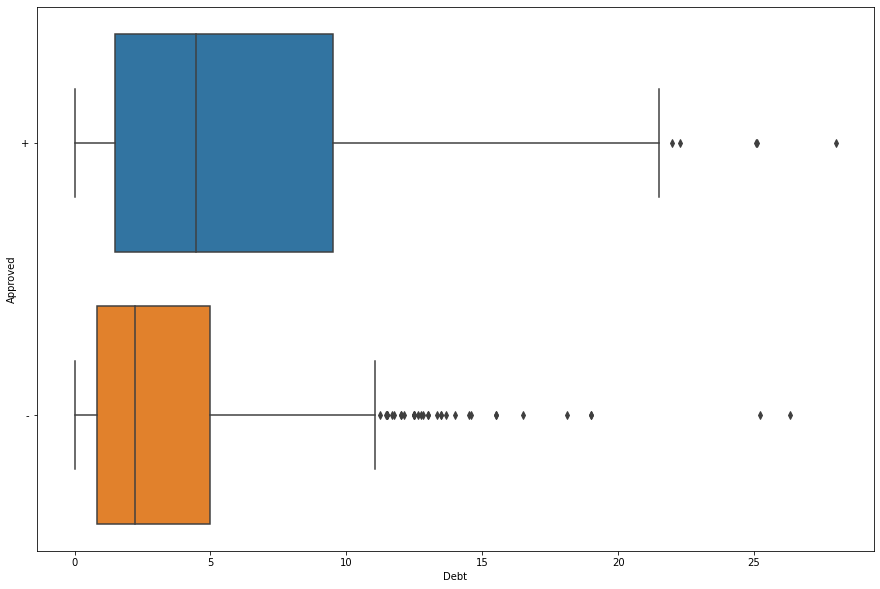

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Debt', y='Approved', data=dataset) #Verificar se existe associação entre a classes + e - e os valores Debt

Já nesse outro Boxplot agrupado pela coluna [Approved], ao analisar o 3º quartil e o limite superior da classe [+], podemos notar que o grupo da classe [+] possuem valores consideravelmente maiores em comparação com o grupo [-].

# Transformação de Dados

Processo realizado para obter-se os dados em uma forma mais apropriada para a mineração. Alguns atributos podem possuir escalas bem distintas, como variações de idade chegando a centenas ou salários, chegando a milhares, e isto pode causar um grande problema no treino do do modelo uma vez o salário por possuir uma escala muito maior que a idade terá uma influência consequentemente muito maior no resultado. Queremos também minimizar o impacto dos outliers em nosso modelo.

Um dos principais tratamentos desta etapa é a normalização como uma das maneiras que buscamos minimizar os problemas oriundos do uso de unidades e dispersões distintas entre as variáveis.

## Normalização dos dados
> A normalização busca levar os valores das colunas a uma escala comum.
Quando a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.  Com a normalização, os algoritmos não considerarão uma coluna mais do que a outra, o que torna a acurária da mineração mais eficiente.

### Normalização de Média
> É um dos métodos mais simples. É feita subtraindo a média e dividindo pelo desvio padrão.

### Normalização Min-Max
> É um dos métodos mais atualizados.  
Subtrai o valor mínimo de um quadro de dados e divide-o pela diferença entre o valor mais alto e mais baixo da acoluna correspondente.  
Pode não ser adequada para Dataframes com muitos outliers.

### Normalização de Quantidades
> É utilizada no caso de análises de dados de alta dimensão. Onde, podemos reduzir o número de atributos.

In [10]:
# DADOS NUMÉRICOS

def mean_norm(dataset):
    return dataset.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

numerics_dataset = dataset[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]
numerics_dataset = mean_norm(numerics_dataset)
numerics_dataset.head()


,Age,Debt,YearsEmployed,CreditScore,Income
0,-0.062276,-0.955920,-0.290872,-0.287892,-0.195272
1,2.286443,-0.060007,0.244013,0.740293,-0.087788
2,-0.596306,-0.855481,-0.216167,-0.493529,-0.037117
3,-0.315371,-0.646569,0.456175,0.534656,-0.194696
4,-0.961606,0.174015,-0.153415,-0.493529,-0.195272


In [11]:
## DADOS NUMÉRICOS NORMALIZADOS
dataset[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']] = numerics_dataset[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]
dataset.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,-0.062276,-0.955920,u,g,w,v,-0.290872,t,t,-0.287892,f,g,00202,-0.195272,+
1,a,2.286443,-0.060007,u,g,q,h,0.244013,t,t,0.740293,f,g,00043,-0.087788,+
2,a,-0.596306,-0.855481,u,g,q,h,-0.216167,t,f,-0.493529,f,g,00280,-0.037117,+
3,b,-0.315371,-0.646569,u,g,w,v,0.456175,t,t,0.534656,t,g,00100,-0.194696,+
4,b,-0.961606,0.174015,u,g,w,v,-0.153415,t,f,-0.493529,f,s,00120,-0.195272,+


# Redução de dados e Métodos para seleção de atributos

Em muitos casos, datasets possuem um número elevado de atributos e valores e o processamento computacional se torna cada vez mais complexo. Para aumentar a eficiência e reduzir os custos computacionais, usamos o processo de redução de dados. 

A redução é, portanto, um processo que visa a obter uma representação reduzida do conjunto de dados que é muito menor no volume, mas que produz os mesmos (ou quase) resultados analíticos com as vantagens de tempo de aprendizagem reduzido e interpretação mais fácil dos conceitos aprendidos. Portanto um trabalho importante e necessário é a seleção dos atributos que mais e agregam valor em nossa solução.

> **4.1 - Redução por agregação de cubo de dados:** É a atividade de construção de um cubo de dados, um formato multidimensional que, apesar de gerar maior necessidade de armazenamento, permite um processamento mais rápido por não necessitar varrer toda a base em busca de determinado valor.

> **4.2 - Seleção de subconjunto de atributos:** É a opção por utilizar os atributos altamente relevantes em detrimento dos menos relevantes. Para realizar a seleção de atributos pode-se usar o nível de significância e o valor p do atributo. O atributo com valor p maior que o nível de significância pode ser descartado.

> **4.3 - Redução de dimensionalidade:** Reduz o tamanho dos dados por mecanismos de codificação. Pode ser com ou sem perdas. Se após a reconstrução a partir dos dados compactados, os dados originais puderem ser recuperados, essa redução será chamada de redução sem perdas. Caso contrário, será denominada redução com perdas. Os dois métodos efetivos de redução de dimensionalidade são: transformação de Wavelet e PCA (Principal Component Analysis).

> **4.4 - Redução da numerosidade:** Redução (sintetização) do volume de dados via representação econômica dos mesmos, tais como modelos paramétricos (que armazenam apenas os parâmetros do modelo em vez dos dados reais) ou métodos não paramétricos tais como agrupamento, amostragem e o uso de histogramas.


Retornando a nosso exemplo, percebemos que nosso dataset não é um destes casos que possuem muitos atributos, mas exploramos abaixo algumas das metodologias apenas como meios demonstrativos para os processos de redução.

In [12]:
dataset.nunique()

Male                2
Age               350
Debt              215
Married             3
BankCustomer        3
EducationLevel     14
Ethnicity           9
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [13]:
# CONVERTENDO VALORES CATEGÓRICOS EM NUMÉRICOS (BINÁRIOS)
from sklearn.preprocessing import OneHotEncoder

# SELEÇÃO DE DADOS CATEGÓRICOS
attr_drop=  ['EducationLevel', 'Ethnicity', 'Citizen', 'ZipCode']
for attr in attr_drop:
  dataset.drop(attr, axis=1, inplace=True)
dataset.head()

,Male,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,b,-0.062276,-0.955920,u,g,-0.290872,t,t,-0.287892,f,-0.195272,+
1,a,2.286443,-0.060007,u,g,0.244013,t,t,0.740293,f,-0.087788,+
2,a,-0.596306,-0.855481,u,g,-0.216167,t,f,-0.493529,f,-0.037117,+
3,b,-0.315371,-0.646569,u,g,0.456175,t,t,0.534656,t,-0.194696,+
4,b,-0.961606,0.174015,u,g,-0.153415,t,f,-0.493529,f,-0.195272,+


In [14]:
# Armazenando atributo de classe para futura análise do PCA
class_dataset = dataset[['Approved']]

In [15]:
class_dataset.value_counts()

Approved
-           383
+           307
dtype: int64

In [16]:
print("selecionar apenas as colunas que sao do tipo objeto/categorigos\n")
categorical_dataset = dataset.select_dtypes(include=['object']).copy()

onehotenconder = OneHotEncoder() 
categorical_dataset = onehotenconder.fit_transform(categorical_dataset).toarray()
print(f'Os {dataset.shape[1]} atributos categóricos foram transformados em {categorical_dataset.shape[1]} Colunas')

selecionar apenas as colunas que sao do tipo objeto/categorigos

Os 12 atributos categóricos foram transformados em 19 Colunas


In [17]:
categorical_dataset = pd.DataFrame(categorical_dataset)

categorical_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


Como os algoritmos não realizam predições com atributos categóricos, o estado final do Dataset deverá ser este, com todos os atributos numéricos para que os algoritmos possam realizar predições eficientes. Com isso, este dataset se torna inelegível para análise humana, fazendo com que os dados não tenham um sentido aparente.

In [18]:
# ESTADO FINAL DO DATASET

numerics_dataset = dataset[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']]
dataset = pd.concat([categorical_dataset, numerics_dataset], axis=1) #Uma coluna ao lado da outra
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Age,Debt,YearsEmployed,CreditScore,Income
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.062276,-0.955920,-0.290872,-0.287892,-0.195272
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.286443,-0.060007,0.244013,0.740293,-0.087788
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.596306,-0.855481,-0.216167,-0.493529,-0.037117
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.315371,-0.646569,0.456175,0.534656,-0.194696
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.961606,0.174015,-0.153415,-0.493529,-0.195272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.884834,1.069928,-0.290872,-0.493529,-0.195272
686,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.750693,-0.805262,-0.066758,-0.082255,-0.119649
687,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.533032,1.755924,-0.066758,-0.287892,-0.195080
688,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.151427,-0.914740,-0.652442,-0.493529,-0.051321


# Separando a base de treino e teste

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, class_dataset, test_size=0.25) # Vamos utilizar 75% dos dados para treinar a máquina e 25% para testar

In [20]:
print(f'{x_train.shape[0]} dados para treinar o modelo')

517 dados para treinar o modelo


In [21]:
print(f'{x_test.shape[0]} dados para testar o modelo')

173 dados para testar o modelo


## Aplicando K-NN

### Separando a base de teste e a base de treino
Com base nos atributos previsores (x_train), queremos fazer a previsão se a pessoa é da classe **+** ou **-** em y_train

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #PORQUE 5? NÃO SEI, NÃO ESTUDEI O ALGORITMO
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Realizar previsões para a base de dados teste

In [23]:
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Vamos gerar uma matriz de confusão para que possamos avaliar o algoritmo
- **EIXO Y**: TRUE CLASS
- **EIXO X**: PREDICTION

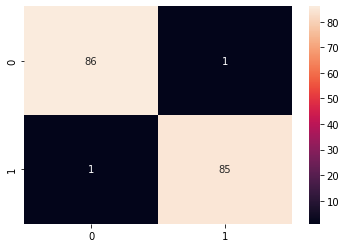

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [25]:
from sklearn.metrics import classification_report
classification_r = classification_report(y_test, y_pred)
print(classification_r)

              precision    recall  f1-score   support

           +       0.99      0.99      0.99        87
           -       0.99      0.99      0.99        86

    accuracy                           0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173



# FALTA ESCREVER
Ao analisar as métricas acima, é possível notar que o algoritmo obteve um ótimo desempenho 

# *Referências*

- **Pedro César Tebaldi Gomes** - *Conheça as Etapas do Pré-Processamento de dados* - Disponível em https://www.datageeks.com.br/pre-processamento-de-dados/ 
- **Caique Coelho** - *Um guia completo para o pré-processamento de dados em machine learning* -  Disponível em https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%PriorDefault-processamento-de-dados-em-machine-learning-f860fbadabe1
- **Maneesha Rajaratne** - *Data Pre Processing Techniques You Should Know* - Disponível em https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6

